<a href="https://colab.research.google.com/github/marcbonastre/RepoTestGroup3/blob/master/PROYECTO_FINAL/Notebooks/BT_MLT_AmesHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de MLT de Barcelona Telco

## Problema ha solucionar


Barcelona Telco liderará la ejecución y explotación del datacenter con sus partners. Desde el equipo ejecutivo se ha decidido que se
enviará a un equipo de gente clave como dispatched employees. A tal efecto, y para dotar de flexibilidad a la compañía y ayudar a los
empleados se ha decidido comprar las propiedades donde el equipo, de no más de 10 personas, van a vivir. Esto es una inversión
grande pero estas casas serán claves para el sistema distribuido de energía.

El CEO con el director de innovación han propuesto los siguientes challenges:
• Con el dataset de precios de las casa en Ames, Iowa:
1. Generar un modelo que sea capaz de predecir el precio de las casas
dadas sus características.
2. Simplificar el modelo con menos datos de entrada y usar aquellos
importantes para un empleado y dadas las limitaciones.

## Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/PROYECTO_FINAL/Datasets/Ames%20Housing%20Price/train.csv',header=0,index_col='Id')
print(df.shape)

(1460, 80)


##Data Exploratory

In [4]:
df.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [6]:
def WhichNans(data):
  totalt = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
  print(missing_data.head(20))
  print(data.shape)
WhichNans(df)

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000
(1460, 80)


In [7]:
def replace(data):
  #ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu,GarageQual,GarageCond, PoolQC,
  data = data.replace(to_replace = ['Ex','Gd','TA','Fa','Po','NA'], value = [5,4,3,2,1,0])
  #CentralAir
  data = data.replace(to_replace = ['No','Yes'], value = [0,1])
  #BsmtExposure
  data = data.replace(to_replace = ['Gd','Av','Mn','No','NA'], value = [4,3,2,1,0])
  return data
df = replace(df)
#
#def LablFunc(data):
#    le = preprocessing.LabelEncoder()
#    lst = {'Embarked','Sex'}
#    print(lst)
#    for i in lst:
#        le.fit(data[i].astype(str))
#        data[i] = le.transform(data[i].astype(str))
#        
#LablFunc(df)
#print(df.columns)


In [8]:
#GarageCond	GarageFinish	GarageQual
df.loc[df['GarageCars'] == 0, 'GarageFinish'] = 'NA'
df.loc[df['GarageCars'] == 0, 'GarageCond'] = 'NA'
df.loc[df['GarageCars'] == 0, 'GarageQual'] = 'NA'
df.loc[df['GarageCars'] == 0, 'GarageType'] = 'NA'
df.loc[df['GarageCars'] == 0, 'GarageYrBlt'] = 'NA'

df.loc[df['GarageCars'].isnull(), 'GarageFinish'] = 'NA'
df.loc[df['GarageCars'].isnull(), 'GarageCond'] = 'NA'
df.loc[df['GarageCars'].isnull(), 'GarageQual'] = 'NA'
df.loc[df['GarageCars'].isnull(), 'GarageArea'] = 'NA'
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = 'NA'

In [9]:
df.loc[df['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = 'NA'
df.loc[df['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = 'NA'
df.loc[df['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 'NA'
df.loc[df['BsmtFullBath'].isnull(),'BsmtFullBath'] = 'NA'
df.loc[df['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = 'NA'
df.loc[df['BsmtUnfSF'].isnull(),'BsmtUnfSF'] = 'NA'
df.loc[df['BsmtCond'].isnull(),'BsmtCond'] = 'NA'
df.loc[df['BsmtExposure'].isnull(),'BsmtExposure'] = 'NA'
df.loc[df['BsmtQual'].isnull(),'BsmtQual'] = 'NA'


In [10]:
df.loc[df['PoolQC'].isnull(), 'PoolQC'] = 'NA'
df.loc[df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NA'

#nans a 0
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = 'NA'
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 'NA'

In [11]:
df_v = replace(df)
WhichNans(df_v)

              Total   Percent
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
SalePrice         0  0.000000
ExterCond         0  0.000000
RoofMatl          0  0.000000
Exterior1st       0  0.000000
Exterior2nd       0  0.000000
MasVnrArea        0  0.000000
ExterQual         0  0.000000
BsmtCond          0  0.000000
Foundation        0  0.000000
BsmtQual          0  0.000000
YearRemodAdd      0  0.000000
BsmtExposure      0  0.000000
BsmtFinSF1        0  0.000000
(1460, 80)


Drop NANS columns

In [12]:
df_v = df_v.drop(columns=['MiscFeature','Alley','Fence','BsmtFinType2','BsmtFinType1','MasVnrType','Electrical'])

In [13]:
WhichNans(df_v)

              Total  Percent
SalePrice         0      0.0
HeatingQC         0      0.0
RoofStyle         0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
ExterCond         0      0.0
Foundation        0      0.0
BsmtQual          0      0.0
BsmtCond          0      0.0
BsmtExposure      0      0.0
BsmtFinSF1        0      0.0
BsmtFinSF2        0      0.0
BsmtUnfSF         0      0.0
TotalBsmtSF       0      0.0
YearRemodAdd      0      0.0
YearBuilt         0      0.0
OverallCond       0      0.0
(1460, 73)


In [14]:
df_v.select_dtypes(include=object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [15]:
le = preprocessing.LabelEncoder()
le.fit(df_v['MSZoning'].astype(str))  
df_v['MSZoning'] = le.transform(df_v['MSZoning'].astype(str))

le.fit(df_v['Street'].astype(str))  
df_v['Street'] = le.transform(df_v['Street'].astype(str))

le.fit(df_v['LotShape'].astype(str))  
df_v['LotShape'] = le.transform(df_v['LotShape'].astype(str))

le.fit(df_v['LandContour'].astype(str))  
df_v['LandContour'] = le.transform(df_v['LandContour'].astype(str))

le.fit(df_v['Utilities'].astype(str))  
df_v['Utilities'] = le.transform(df_v['Utilities'].astype(str))

le.fit(df_v['LotConfig'].astype(str))  
df_v['LotConfig'] = le.transform(df_v['LotConfig'].astype(str))

le.fit(df_v['LandSlope'].astype(str))  
df_v['LandSlope'] = le.transform(df_v['LandSlope'].astype(str))

le.fit(df_v['Neighborhood'].astype(str))  
df_v['Neighborhood'] = le.transform(df_v['Neighborhood'].astype(str))

le.fit(df_v['Condition1'].astype(str))  
df_v['Condition1'] = le.transform(df_v['Condition1'].astype(str))

le.fit(df_v['Condition2'].astype(str))  
df_v['Condition2'] = le.transform(df_v['Condition2'].astype(str))

le.fit(df_v['BldgType'].astype(str))  
df_v['BldgType'] = le.transform(df_v['BldgType'].astype(str))

le.fit(df_v['HouseStyle'].astype(str))  
df_v['HouseStyle'] = le.transform(df_v['HouseStyle'].astype(str))

le.fit(df_v['RoofStyle'].astype(str))  
df_v['RoofStyle'] = le.transform(df_v['RoofStyle'].astype(str))

le.fit(df_v['RoofMatl'].astype(str))  
df_v['RoofMatl'] = le.transform(df_v['RoofMatl'].astype(str))

le.fit(df_v['Exterior1st'].astype(str))  
df_v['Exterior1st'] = le.transform(df_v['Exterior1st'].astype(str))

le.fit(df_v['Exterior2nd'].astype(str))  
df_v['Exterior2nd'] = le.transform(df_v['Exterior2nd'].astype(str))

le.fit(df_v['Foundation'].astype(str))  
df_v['Foundation'] = le.transform(df_v['Foundation'].astype(str))

le.fit(df_v['Heating'].astype(str))  
df_v['Heating'] = le.transform(df_v['Heating'].astype(str))

le.fit(df_v['CentralAir'].astype(str))  
df_v['CentralAir'] = le.transform(df_v['CentralAir'].astype(str))

le.fit(df_v['Functional'].astype(str))  
df_v['Functional'] = le.transform(df_v['Functional'].astype(str))

le.fit(df_v['GarageType'].astype(str))  
df_v['GarageType'] = le.transform(df_v['GarageType'].astype(str))

le.fit(df_v['GarageFinish'].astype(str))  
df_v['GarageFinish'] = le.transform(df_v['GarageFinish'].astype(str))

le.fit(df_v['PavedDrive'].astype(str))  
df_v['PavedDrive'] = le.transform(df_v['PavedDrive'].astype(str))

le.fit(df_v['SaleType'].astype(str))  
df_v['SaleType'] = le.transform(df_v['SaleType'].astype(str))

le.fit(df_v['SaleCondition'].astype(str))  
df_v['SaleCondition'] = le.transform(df_v['SaleCondition'].astype(str))

In [16]:
df_v.select_dtypes(include='number').columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'

In [17]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [18]:
#MultiColumnLabelEncoder(columns = df_v.select_dtypes(include='number').columns).fit_transform(df_v)

In [19]:
#MultiColumnLabelEncoder(columns = ['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageFinish', 'GarageType', 'Heating', 'HouseStyle', 'Id', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']).fit_transform(df_v)

In [20]:
#from sklearn.compose import make_column_selector
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import OneHotEncoder

#categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
#       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
#       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
#       'SaleType', 'SaleCondition']
#numerical_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
#       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
#       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
#       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
#       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
#       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
#       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#       'PoolQC', 'MiscVal', 'MoSold', 'YrSold']
#column_trans = make_column_selector(
#    (categorical_columns, OneHotEncoder(handle_unknown='ignore'),
#    (numerical_columns, RobustScaler())
#column_trans.fit_transform(df_v)

## Only Numbers

In [21]:
data = df_v.select_dtypes(include= 'number')
WhichNans(data)

              Total  Percent
SalePrice         0      0.0
HeatingQC         0      0.0
RoofStyle         0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
ExterCond         0      0.0
Foundation        0      0.0
BsmtQual          0      0.0
BsmtCond          0      0.0
BsmtExposure      0      0.0
BsmtFinSF1        0      0.0
BsmtFinSF2        0      0.0
BsmtUnfSF         0      0.0
TotalBsmtSF       0      0.0
YearRemodAdd      0      0.0
YearBuilt         0      0.0
OverallCond       0      0.0
(1460, 73)


## Algoritmo de Machine Learning

### Pruebas con Clasificador

In [23]:
target = data['SalePrice'].values
data = data.drop(['SalePrice'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

####RandomForest

In [ ]:
#{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 20}
#{'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 20}
RFC = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 500,random_state = 20) #max 5 niveles de arbol, 4 splits, siempre empieze en el mismo
RFC.fit(x_train, y_train) 
train_prediction = RFC.predict(x_train)
print("La accuracy de este train es {}.".format(accuracy_score(y_train,train_prediction)))
#print(classification_report(y_train, train_prediction))

test_prediction = RFC.predict(x_test)
print("La accuracy de este test es {}.".format(accuracy_score(y_test,test_prediction)))
#print(classification_report(y_test, test_prediction))

La accuracy de este train es 0.8356164383561644.
La accuracy de este test es 0.00821917808219178.


####AutoML

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,303 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpa

In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [ ]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=1200, 
          per_run_time_limit=300,
          )

# train model(s)
automl.fit(x_train, y_train)

# evaluate
y_hat = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)

[WARNING] [2020-07-12 11:25:02,699:EnsembleBuilder(1):29fbeae3048f23904fd3fe8ca11f2781] Memory Exception -- restart with less ensemble_nbest: 25
[WARNING] [2020-07-12 11:25:02,753:EnsembleBuilder(1):29fbeae3048f23904fd3fe8ca11f2781] Memory Exception -- restart with less ensemble_nbest: 12
[WARNING] [2020-07-12 11:25:02,806:EnsembleBuilder(1):29fbeae3048f23904fd3fe8ca11f2781] Memory Exception -- restart with less ensemble_nbest: 6
[WARNING] [2020-07-12 11:25:02,862:EnsembleBuilder(1):29fbeae3048f23904fd3fe8ca11f2781] Memory Exception -- restart with less ensemble_nbest: 3
[WARNING] [2020-07-12 11:25:02,913:EnsembleBuilder(1):29fbeae3048f23904fd3fe8ca11f2781] Memory Exception -- restart with less ensemble_nbest: 1


In [ ]:
print("Test Accuracy score {0}".format(test_acc))
print(automl.sprint_statistics())
print(automl.show_models())

Test Accuracy score 0.0027397260273972603
auto-sklearn results:
  Dataset name: 29fbeae3048f23904fd3fe8ca11f2781
  Metric: accuracy
  Best validation score: 0.024862
  Number of target algorithm runs: 19
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 3

[(0.540000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'lda', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'nystroem_sampler', 'classifier:lda:n_components': 61, 'classifier:lda:shrinkage

###Pruebas con Regresor

####RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

RFC_R = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC_R.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

####AutoML

In [ ]:
import autosklearn.regression

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)
automl.fit(x_train, y_train)

[WARNING] [2020-07-13 18:48:34,107:AutoMLSMBO(1)::29fbeae3048f23904fd3fe8ca11f2781] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=True,
                     delete_tmp_folder_after_terminate=True,
                     disable_evaluator_output=False, ensemble_memory_limit=1024,
                     ensemble_nbest=50, ensemble_size=50,
                     exclude_estimators=None, exclude_preprocessors=None,
                     get_smac_object_callback=None, include_estimators=None,
                     include_preprocessors=None,
                     initial_configurations_via_metalearning=25,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=3072,
                     n_jobs=None, output_folder=None, per_run_time_limit=30,
                     resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=120, tmp_folder=None)

In [ ]:
print(automl.show_models())

[(0.860000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 8.448237204757965e-09, 'regressor:gradient_boosting:learning_rate': 0.04843053046966659, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_iter': 259, 'regressor:gradient_boosting:max_leaf_nodes': 1033, 'regressor:gradient_boosting:min_samples_leaf': 12, 'regressor:gradient_boosting:scoring':

In [ ]:
predictions_automl = automl.predict(x_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions_automl))

R2 score: 0.8685683778222033


####XGBoost

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [26]:
# Entrenamos el modelo
XGB = xgb.XGBClassifier()
XGB.fit(x_train, y_train)

# Hacemos las predicciones
y_pred_XGB = XGB.predict(x_test)

# Evaluamos las predicciones
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("Accuracy: %.15f%%" % (accuracy_XGB * 100.0))

Accuracy: 0.821917808219178%


Realizamos un plot_importance para saber que features tienen mas importancia a la hora de tener una enfermedad en el corazón.

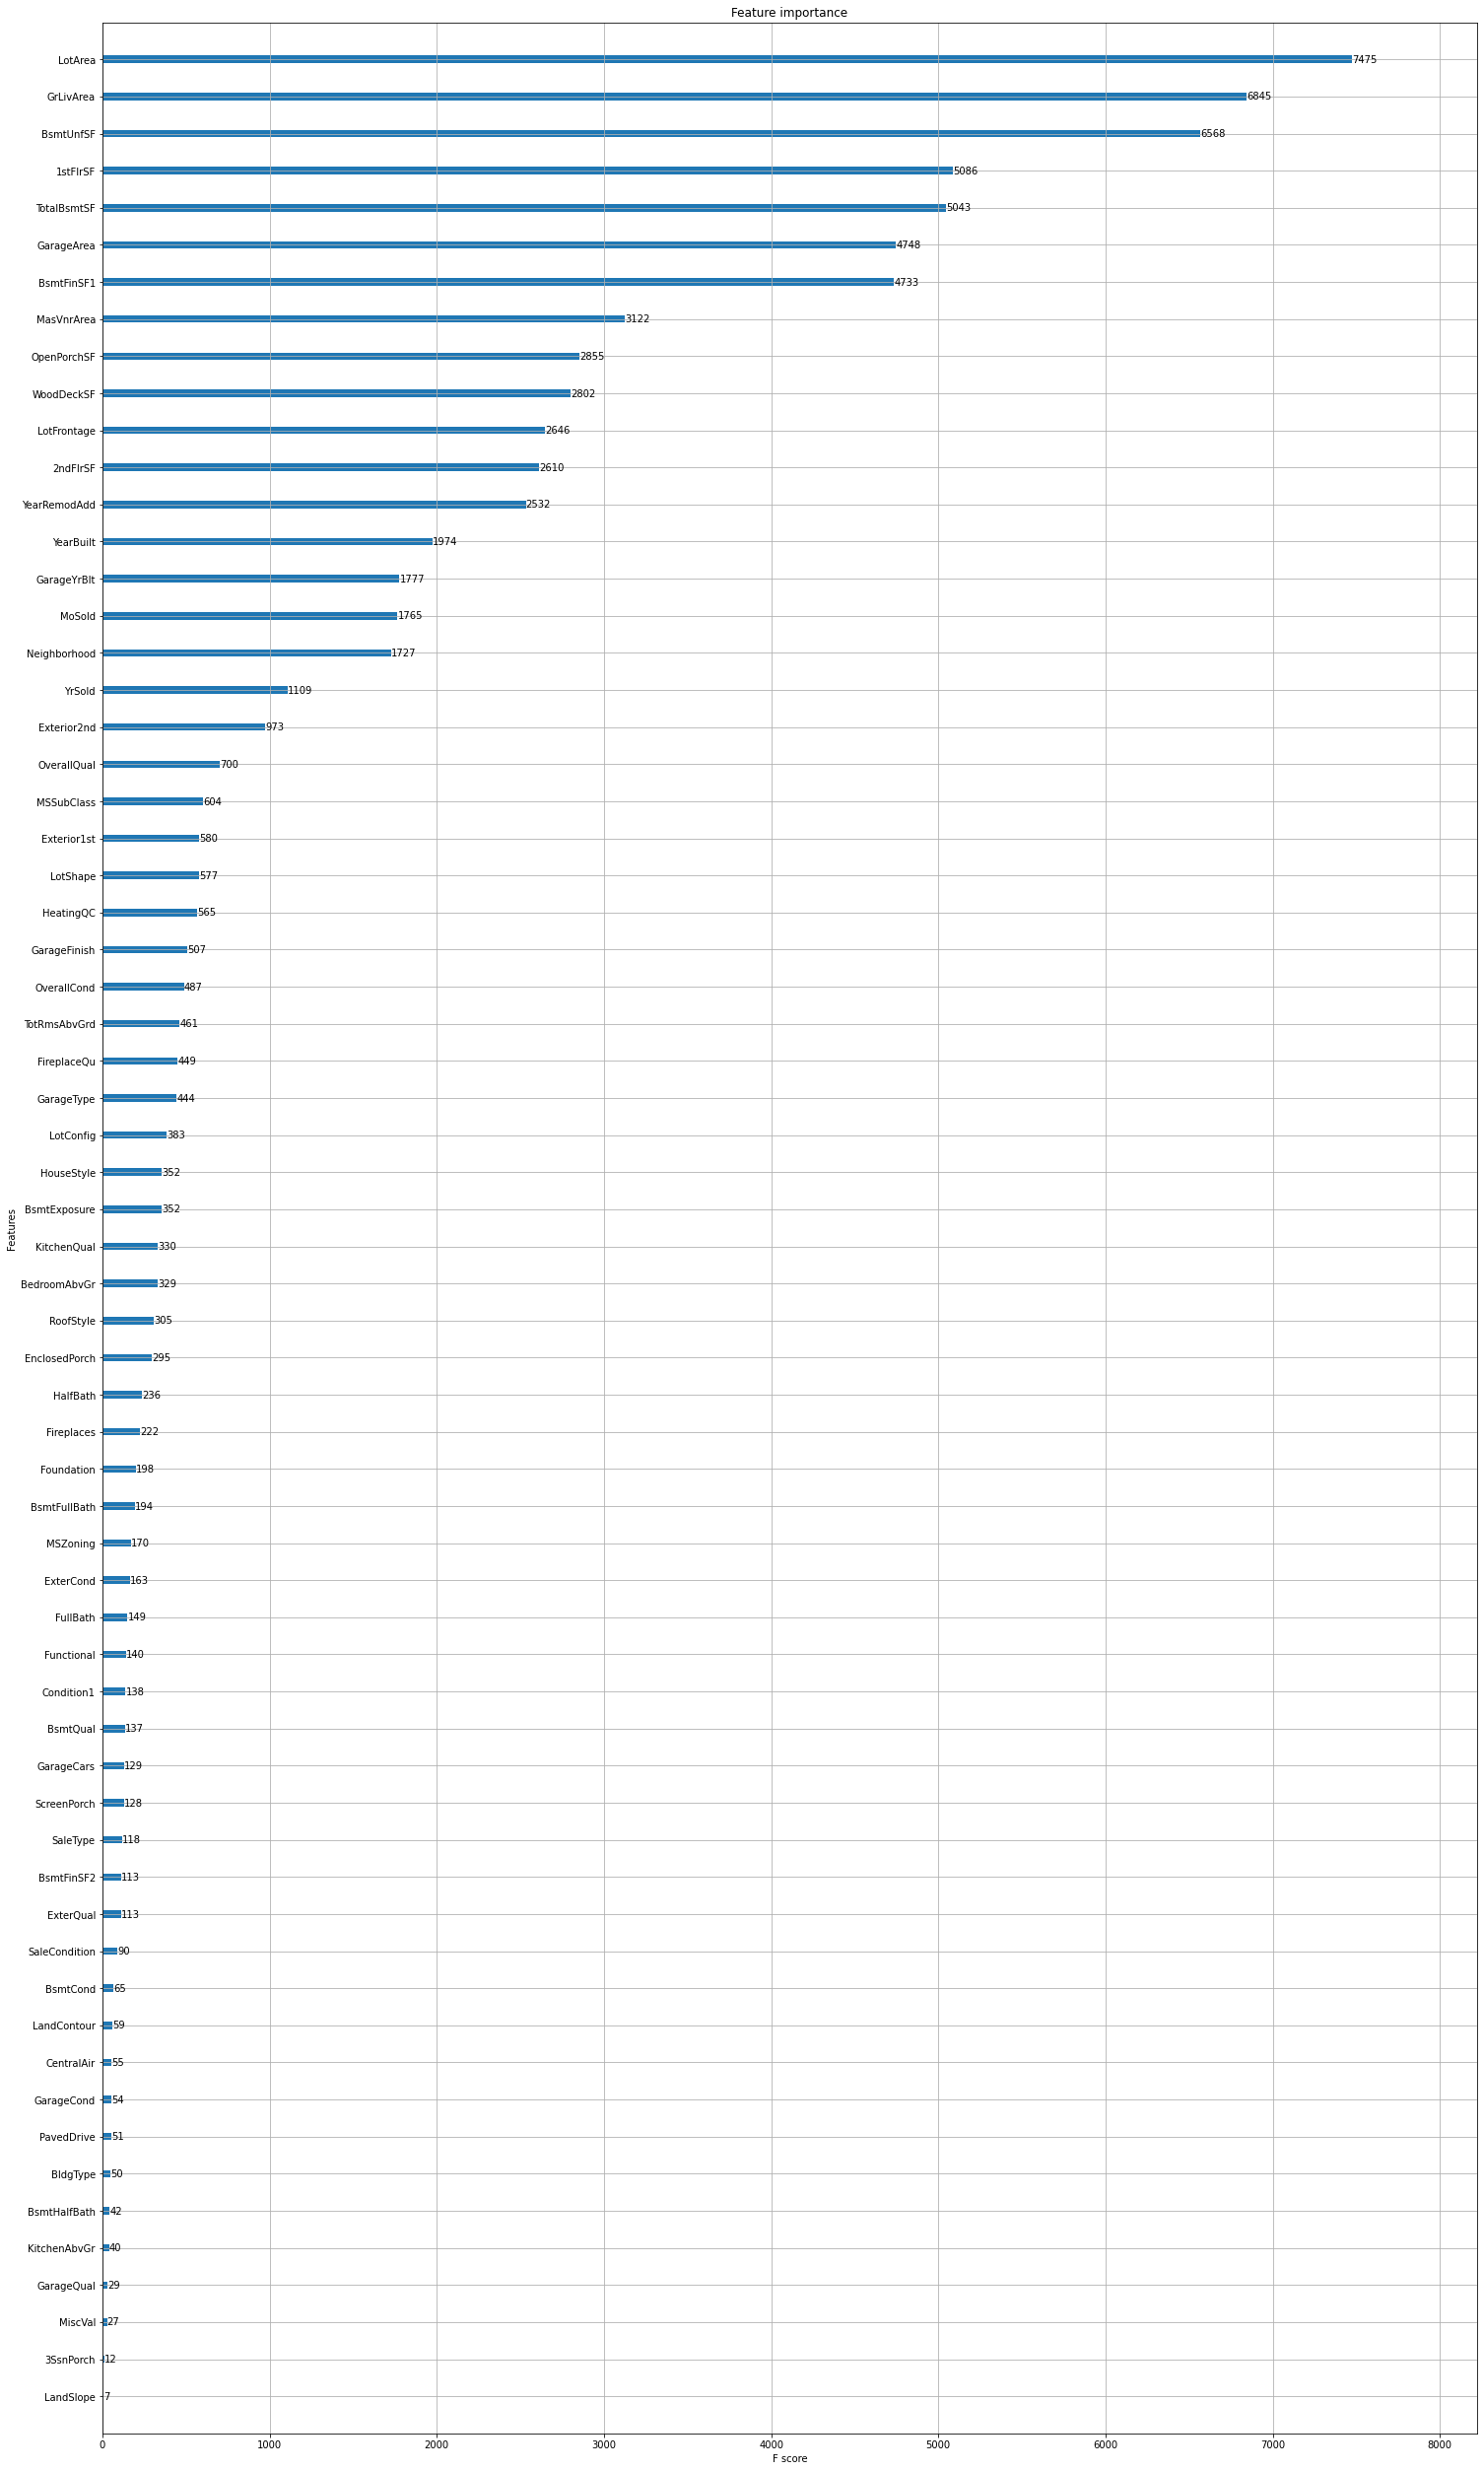

In [50]:
xgb.plot_importance(XGB)
plt.rcParams['figure.figsize'] = [15,20]
plt.show()

## Reduccio de dimensionalitat

### PCA

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(data)

In [ ]:
XS.shape

(1460, 72)

In [ ]:
#Aplicar PCA a los datos escalados
pca = decomposition.PCA(n_components=72).fit(XS)
#Proyección de los datos en el espacio PCA
Xproj = pca.transform(XS)
Xproj.shape

(1460, 72)

In [ ]:
print('Valores propios = {} {} {} {} {} {} {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {} {} {} {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 10.387106802226135 3.9930964833436535 3.6377602064260275 3.3965824612955773 2.6923122518840494 2.3436414698102572 1.9849801571228427 1.9088857046163992 1.6654725127734498 1.5827801434610986 1.491798695681596 1.4084485557188133 1.3578166787036547 1.3405085675055344
Fracción de la varianza explicada = 0.14416656035433723 0.05542168730211557 0.050489841525642815 0.04714244492989199 0.03736761392217301 0.03252828105453923 0.027550285856566086 0.026494142342421288 0.0231157191413286 0.021968000659339255 0.020705234941014537 0.019548387012878123 0.018845648156665066 0.018605422374339556


In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 14.41665604,  19.95882477,  25.00780892,  29.72205341,
        33.4588148 ,  36.71164291,  39.46667149,  42.11608573,
        44.42765764,  46.62445771,  48.6949812 ,  50.6498199 ,
        52.53438472,  54.39492696,  56.1462774 ,  57.85221439,
        59.52856596,  61.18227392,  62.78610933,  64.33582784,
        65.81595387,  67.27366169,  68.66426774,  70.03196232,
        71.37677364,  72.68867932,  73.94621281,  75.17935309,
        76.39327708,  77.58992027,  78.74897524,  79.85402655,
        80.93249889,  81.99601987,  83.03632757,  84.04719403,
        85.01907227,  85.9481909 ,  86.86971196,  87.74220692,
        88.59137624,  89.3869665 ,  90.16608486,  90.92033542,
        91.64584938,  92.34556234,  92.98384105,  93.59819697,
        94.19490169,  94.75342029,  95.28387776,  95.80261179,
        96.28807028,  96.73524156,  97.14159886,  97.51328114,
        97.8592576 ,  98.16904896,  98.45567162,  98.69169108,
        98.91193121,  99.10297148,  99.26059969,  99.41

In [ ]:
# Reducir dimensionalidad de los datos quedandonos con 48 componentes PCA:
ndim_reducida = 48 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

data_reduced = pd.DataFrame(XPCA)

Dimensionalidad datos en espacio PCA reducido = (1460, 48)


**ML con reduccion de dimensionalidad PCA**

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(data_reduced, target, test_size=0.25, random_state=42)

In [ ]:
RFC_R_pca = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC_R_pca.fit(x_train_pca, y_train_pca)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

###RFE 

Hemos intentado buscar las 48 features més importantes para poder eliminarlas pero el codigo acaba dando error por demasiado tiempo de computacién. Lo dejamos ejecutando durante 2 horas y no hubo manera.

Dejamos el código a continuación:

In [ ]:
#from sklearn.svm import SVC
#from sklearn.feature_selection import RFE

#print('Data shape: {}'.format(data.shape))

# Create the RFE object and rank each pixel
#svc = SVC(kernel="linear", C=1) 
# clf = tree.DecisionTreeClassifier()
#rfe = RFE(estimator=svc, n_features_to_select=48, step=1)
#rfe.fit(data, target)
#print('Ranging features: {}'.format(rfe.ranking_))
#array=[]
#for i in range(len(rfe.ranking_)):
#  if rfe.ranking_[i] != 1:
#     array.append(data.columns[i])
#new_data = data
#new_data = new_data.drop(columns=array)
#new_data.shape

### TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
data_TSNE = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(data_reduced)
data_TSNE.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.008s...
[t-SNE] Computed neighbors for 1460 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 2.579972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.304001
[t-SNE] KL divergence after 300 iterations: 1.401568


(1460, 2)

In [ ]:
x_train_tsne, x_test_tsne, y_train_tsne, y_test_tsne = train_test_split(data_TSNE, target, test_size=0.25, random_state=42)

In [ ]:
RFC_R_tsne = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC_R_tsne.fit(x_train_tsne, y_train_tsne)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [ ]:
r2test_tsne = RFC_R_tsne.score(x_test_tsne,y_test_tsne)
r2train_tsne = RFC_R_tsne.score(x_train_tsne,y_train_tsne)
print("R2 score train:",r2train_tsne)
print("R2 score test:",r2test_tsne)

R2 score train: 0.7757535187677848
R2 score test: 0.6973201994753779


## Resultados

###Sin reducir dimensionalidad

In [ ]:
train_predict = RFC_R.predict(x_train)
test_predict = RFC_R.predict(x_test)

r2test = RFC_R.score(x_test,y_test)
r2train = RFC_R.score(x_train,y_train)
print("R2 score train:",r2train)
print("R2 score test:",r2test)

R2 score train: 0.9102416046613544
R2 score test: 0.8658413067372508


###Reduciendo rimensionalidad

In [ ]:
train_predict_pca = RFC_R_pca.predict(x_train_pca)
test_predict_pca = RFC_R_pca.predict(x_test_pca)

r2test_pca = RFC_R_pca.score(x_test_pca,y_test_pca)
r2train_pca = RFC_R_pca.score(x_train_pca,y_train_pca)
print("R2 score train:",r2train_pca)
print("R2 score test:",r2test_pca)

R2 score train: 0.9223251808632131
R2 score test: 0.8677239729422362


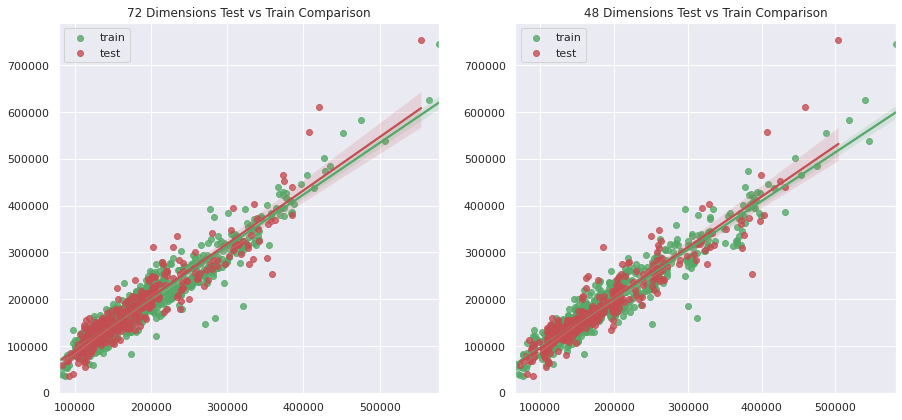

In [ ]:
sns.set(color_codes=True)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
ax = sns.regplot(train_predict, y_train, label='train', color = 'g')
ax = sns.regplot(test_predict, y_test, label='test', color = 'r')
ax.set_title('72 Dimensions Test vs Train Comparison')
ax.legend()

ax2 = fig.add_subplot(222)
ax2 = sns.regplot(train_predict_pca, y_train, label='train', color = 'g')
ax2 = sns.regplot(test_predict_pca, y_test, label='test', color = 'r')
ax2.set_title('48 Dimensions Test vs Train Comparison')
ax2.legend()

## Discusión y Conclusiones

Hemos podido ver que reduciendo las dimensones con PCA de 72 a 48 y a posteriori aplicamos un algoritmo de machine learning (en este caso el Random Forest), obtenemos la misma score e incluso un poco mejor que si no aplicamos la reducción de dimensionalidad.

## Linias de desarrollo futuro

### Annexo 1 : Guardar y/o cargar el modelo


In [ ]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [ ]:
#import joblib
#filename = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn.pkl'
#joblib.dump(RFC, filename)

In [ ]:
#RFC = joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn.pkl')
#RFC_rf= joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn_rf.pkl')

### Annexo 2 :